In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ["ACCELYA.NS", "CASTROLIND.NS","COALINDIA.NS","DEEPAKNTR.NS","GSFC.NS",
           "GSPL.NS","MGL.NS","NMDC.NS","SPIC.NS","SUNTV.NS","TATAMETALI.NS"]

In [3]:
mydata = pd.DataFrame()

In [4]:
for ticker in tickers:
    mydata[ticker]= wb.DataReader(ticker,data_source='yahoo',start="2010-1-1")["Adj Close"]

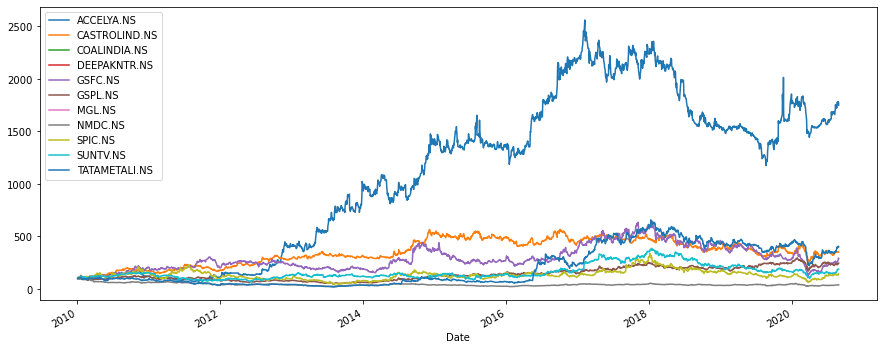

In [5]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [9]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,ACCELYA.NS,CASTROLIND.NS,COALINDIA.NS,DEEPAKNTR.NS,GSFC.NS,GSPL.NS,MGL.NS,NMDC.NS,SPIC.NS,SUNTV.NS,TATAMETALI.NS
Date,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.001064,0.006120,NaN,NaN,0.104779,0.023798,NaN,-0.003510,0.049844,0.001717,0.031024
2010-01-06,0.000000,-0.012497,NaN,NaN,0.012723,-0.004451,NaN,0.003053,0.005935,-0.007144,0.031093
2010-01-07,0.050053,0.003796,NaN,NaN,-0.011649,-0.013413,NaN,-0.017090,-0.008850,0.002159,0.017186
2010-01-08,-0.005071,0.002102,NaN,NaN,-0.012249,0.001007,NaN,-0.000714,0.050595,0.030873,0.002550


In [10]:
weights = np.array([ 0.06,0.05,0.05,0.05 , 0.32 , 0.05 , 0.06 , 0.05 , 0.22 , 0.06 , 0.03 ])

In [12]:
annual_returns = returns.mean()*250

In [13]:
np.dot(annual_returns,weights)

0.1928662218414039

In [16]:
pf = f"{round(np.dot(annual_returns,weights)*100,5)}%"

In [17]:
print(pf)

19.28662%


In [19]:
mydata.to_csv("tickers.csv")